# Import Modules

In [38]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the Iris Dataset

In [43]:
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Drop the Unwanted Columns

In [46]:
data.drop(columns='Id',axis=1,inplace=True) 

In [48]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [52]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Preprocess the Data

In [55]:
data.isnull().sum() 

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

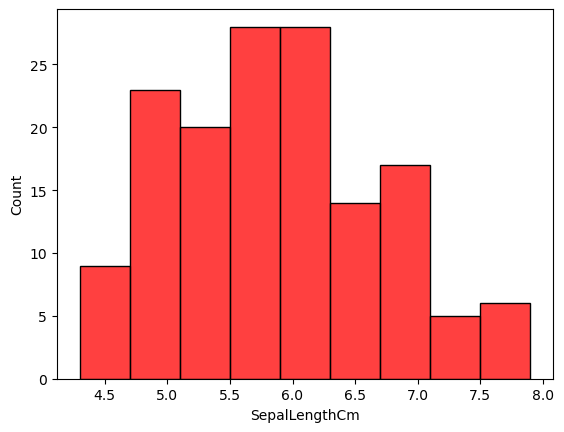

In [58]:
# histograms
sns.histplot(data=data,x='SepalLengthCm',color='Red')

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

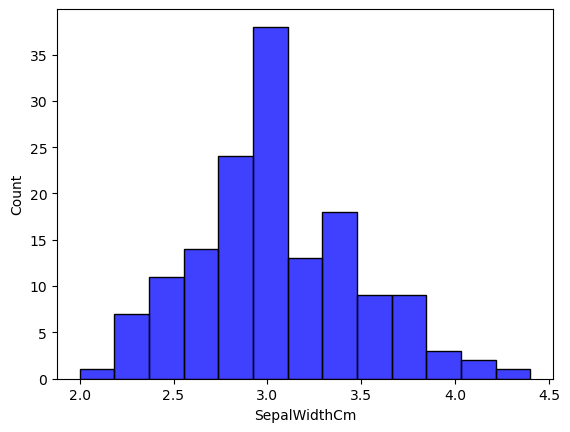

In [59]:
# histograms
sns.histplot(data=data,x='SepalWidthCm',color='Blue')

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

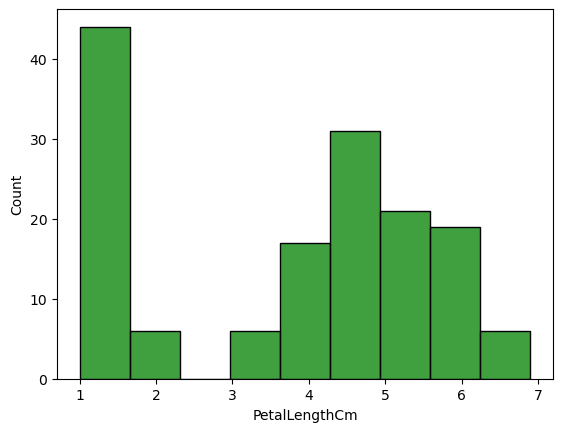

In [61]:
# histograms
sns.histplot(data=data,x='PetalLengthCm',color='Green')

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

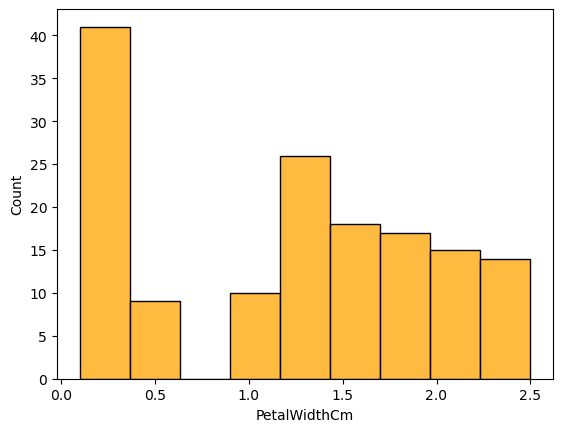

In [63]:
sns.histplot(data=data,x='PetalWidthCm',color='Orange')

In [65]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

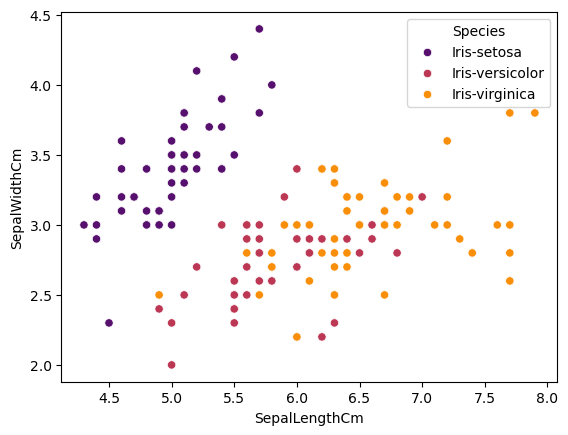

In [66]:
sns.scatterplot(data=data,x='SepalLengthCm',y='SepalWidthCm',hue='Species',palette='inferno')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

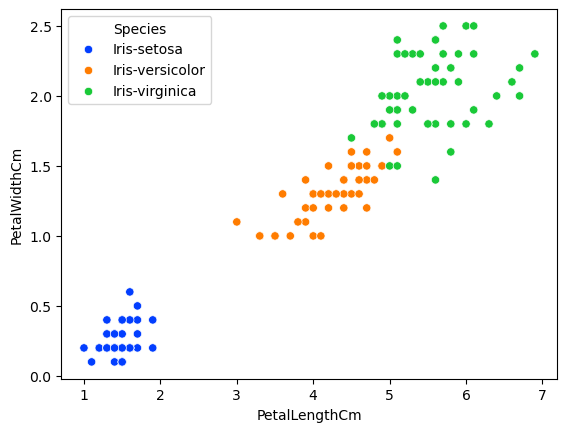

In [69]:
sns.scatterplot(data=data,x='PetalLengthCm',y='PetalWidthCm',hue='Species',palette='bright')

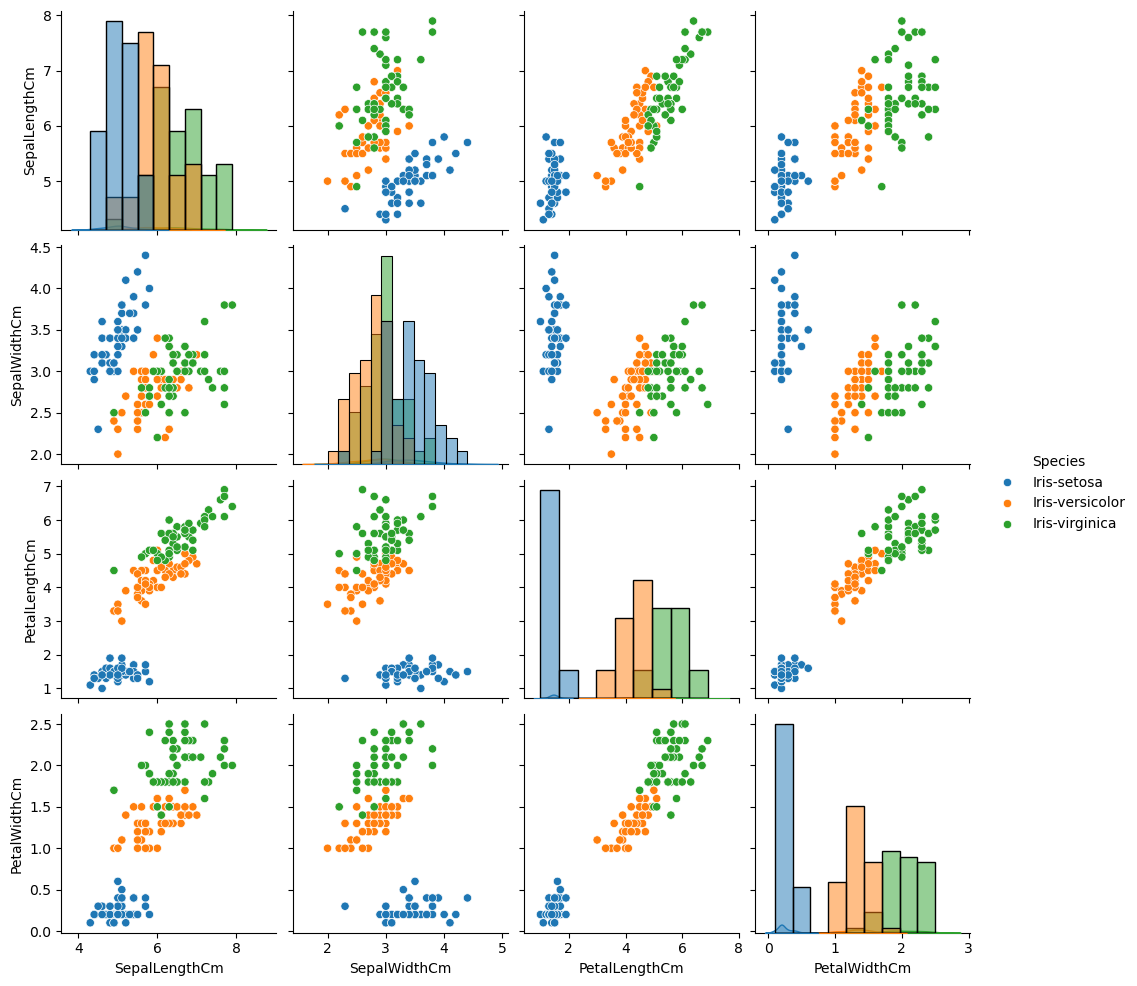

In [70]:
g=sns.pairplot(data=data,hue='Species')
g.map_diag(sns.histplot)

# Correlation Matrix and Label Encoder

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [75]:
iris_corr=data.corr()
iris_corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


# Heat Map


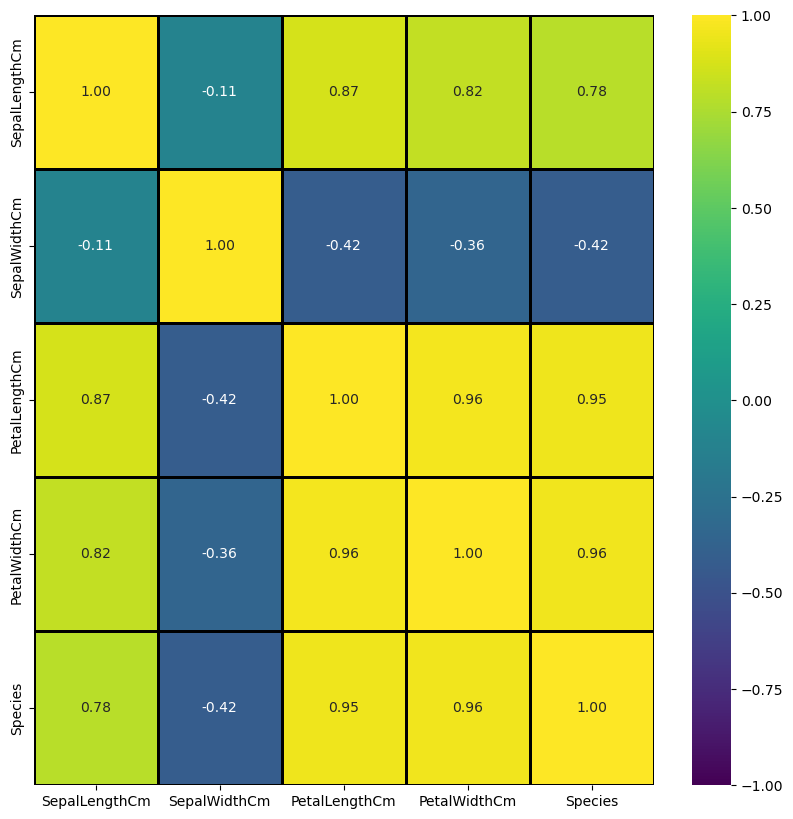

In [80]:
plt.figure(figsize=(10,10))
g=sns.heatmap(iris_corr,annot=True,linecolor='black',linewidths=1,cmap='viridis',fmt=".2f", vmin=-1,vmax=1)
plt.show()

# Model Training

In [83]:
X = data.drop(columns=['Species'])
Y = data['Species']
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [85]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=13)

# Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_regression_pred = logistic_regression_model.predict(X_test)
regression_accuracy = (accuracy_score(y_test, logistic_regression_pred))*100
print(f'Regression Accuracy: {regression_accuracy:}')

Regression Accuracy: 97.36842105263158


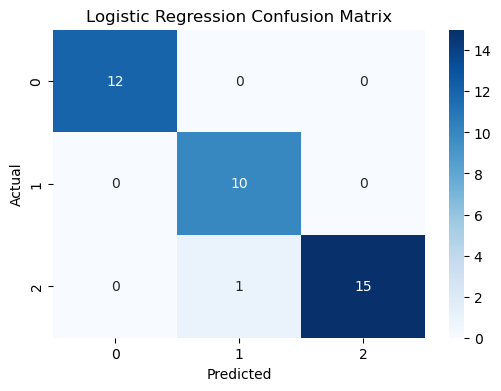

In [92]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, logistic_regression_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=94, random_state=56)
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)*100
print(f'Random Forest Accuracy: {random_forest_accuracy:}')

Random Forest Accuracy: 94.73684210526315


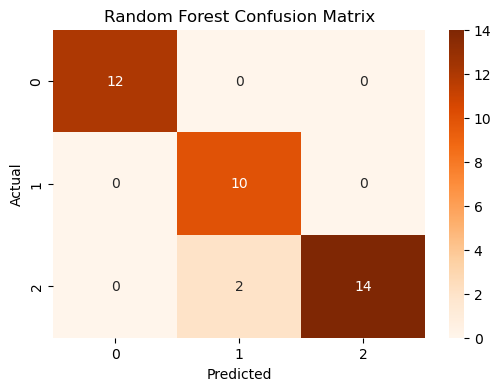

In [97]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, random_forest_pred), annot=True, fmt='d', cmap='Oranges')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()